<a href="https://colab.research.google.com/github/AvyaM/salaryPrediction/blob/main/salaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [8]:
df = pd.read_csv('glassdoor_jobs.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)
df = df[df['Salary Estimate'] != '-1']
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
minus_Kd = salary.apply(lambda x: x.replace('K','').replace('$',''))
min_hr = minus_Kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))
df['Salary Estimate'] = min_hr
df.head()

<ipython-input-4-f35c3b12f049>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'] = min_hr


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0


In [5]:
df['min_salary'] = min_hr.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = min_hr.apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary+df.max_salary)/2
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3], axis = 1)
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])
df.job_state.value_counts()
df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis = 1)
df['age'] = df.Founded.apply(lambda x: x if x <1 else 2020 - x)
df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df.R_yn.value_counts()
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df.spark.value_counts()
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df.aws.value_counts()
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df.excel.value_counts()
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [6]:
df_out = df.drop(['Unnamed: 0'], axis =1)
df_out.to_csv('salary_data_cleaned.csv',index = False)

In [10]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [11]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [12]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [13]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [14]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [15]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [16]:
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [17]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [18]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [19]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [20]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [22]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


from matplotlib import pyplot as plt
_df_0['min_salary'].plot(kind='hist', bins=20, title='min_salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['max_salary'].plot(kind='hist', bins=20, title='max_salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='min_salary', y='max_salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hourly']
  ys = series['min_salary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('hourly', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hourly')
_ = plt.ylabel('min_salary')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hourly']
  ys = series['max_salary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('hourly', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hourly')
_ = plt.ylabel('max_salary')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['hourly']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'hourly'}, axis=1)
              .sort_values('hourly', ascending=True))
  xs = counted['hourly']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('hourly', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hourly')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['min_salary'].plot(kind='line', figsize=(8, 4), title='min_salary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['max_salary'].plot(kind='line', figsize=(8, 4), title='max_salary')
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [24]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

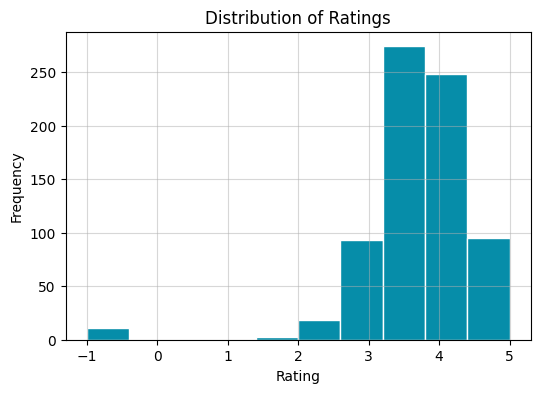

In [26]:
plt.figure(figsize=(6, 4))

plt.hist(df.Rating, bins=10, color='#068DA9', edgecolor='white')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

plt.grid(True, linestyle='-', alpha=0.5)

plt.show()


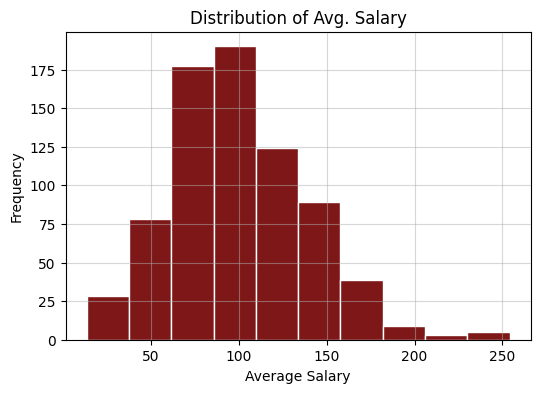

In [27]:
plt.figure(figsize=(6, 4))

plt.hist(df.avg_salary, bins=10, color='#7E1717', edgecolor='white')

plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Avg. Salary')

plt.grid(True, linestyle='-', alpha=0.5)

plt.show()

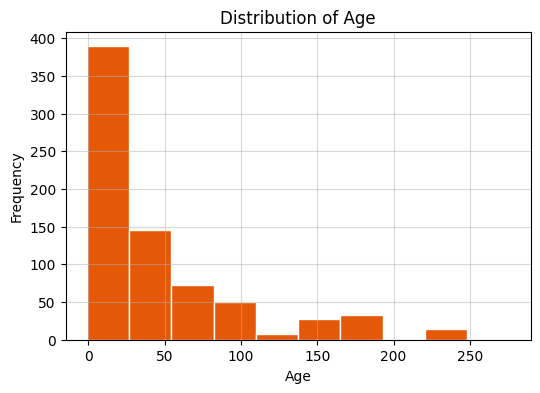

In [28]:
plt.figure(figsize=(6, 4))

plt.hist(df.age, bins=10, color='#E55807', edgecolor='white')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.grid(True, linestyle='-', alpha=0.5)

plt.show()

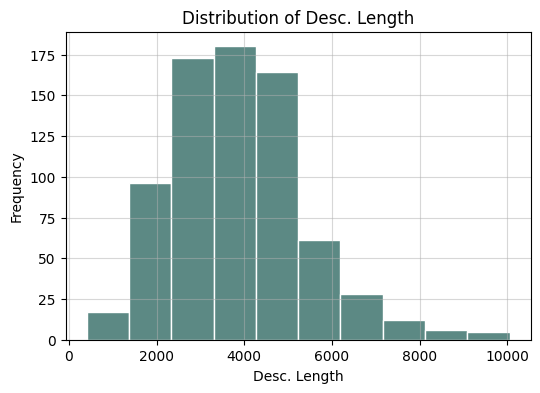

In [29]:
plt.figure(figsize=(6, 4))

plt.hist(df.desc_len, bins=10, color='#5C8984', edgecolor='white')

plt.xlabel('Desc. Length')
plt.ylabel('Frequency')
plt.title('Distribution of Desc. Length')

plt.grid(True, linestyle='-', alpha=0.5)

plt.show()

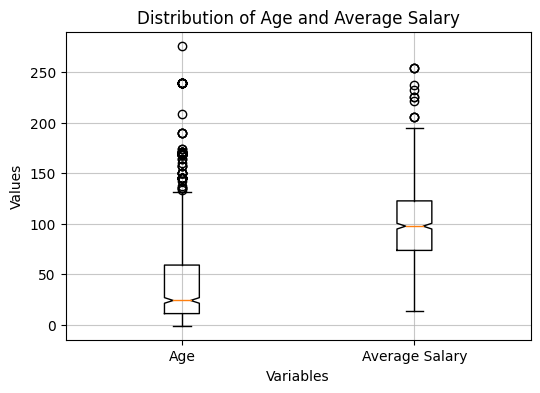

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot([df['age'], df['avg_salary']], notch=True, labels=['Age', 'Average Salary'])

plt.title("Distribution of Age and Average Salary")
plt.xlabel("Variables")
plt.ylabel("Values")

plt.grid(True, linestyle='-', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

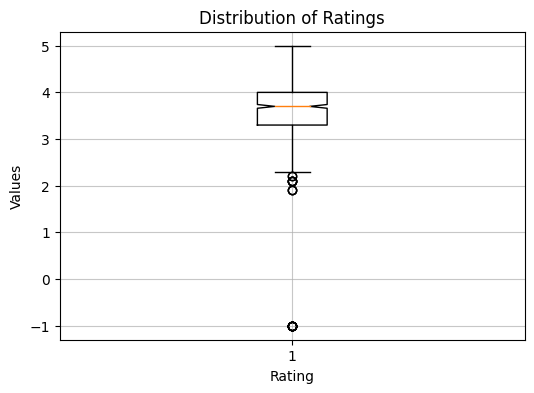

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(df['Rating'], notch=True)

plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Values")

plt.grid(True, linestyle='-', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [35]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

from matplotlib import pyplot as plt
_df_10['avg_salary'].plot(kind='hist', bins=20, title='avg_salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['avg_salary'].plot(kind='line', figsize=(8, 4), title='avg_salary')
plt.gca().spines[['top', 'right']].set_visible(False)

In [34]:
df.to_csv('eda_data.csv', index=False)

In [38]:
df = pd.read_csv('eda_data.csv')
df.columns

df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided', 'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

df_dum = pd.get_dummies(df_model)

X = df_dum.drop('avg_salary', axis=1)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

lm = LinearRegression()
lm.fit(X_train, y_train)
print(np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=4)))

lm_l = Lasso(alpha=0.13)
lm_l.fit(X_train, y_train)
print(np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))

alpha = []
error = []
for i in range(1, 100):
    alpha.append(i / 100)
    lml = Lasso(alpha=(i / 100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))

err = list(zip(alpha, error))
df_err = pd.DataFrame(err, columns=['alpha', 'error'])
print(df_err[df_err.error == max(df_err.error)])

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))

tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = rf.predict(X_test)

print(mean_absolute_error(y_test, tpred_lm))
print(mean_absolute_error(y_test, tpred_lml))
print(mean_absolute_error(y_test, tpred_rf))
print(mean_absolute_error(y_test, (tpred_lm + tpred_rf) / 2))


-19.77069790381779
-19.257798079999773
    alpha      error
12   0.13 -19.257798
-15.117535891914065
18.85518999020981
19.665303712749914
11.27486577181208
14.327899265622388


In [40]:


models = ['Linear Regression', 'Lasso Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']  # Removed the extra comma
mae_scores = []
r2_scores = []
mse_scores = []

mae_lm = mean_absolute_error(y_test, tpred_lm)
r2_lm = r2_score(y_test, tpred_lm)
mse_lm = mean_squared_error(y_test, tpred_lm)
mae_scores.append(mae_lm)
r2_scores.append(r2_lm)
mse_scores.append(mse_lm)

mae_lml = mean_absolute_error(y_test, tpred_lml)
r2_lml = r2_score(y_test, tpred_lml)
mse_lml = mean_squared_error(y_test, tpred_lml)
mae_scores.append(mae_lml)
r2_scores.append(r2_lml)
mse_scores.append(mse_lml)

mae_rf = mean_absolute_error(y_test, tpred_rf)
r2_rf = r2_score(y_test, tpred_rf)
mse_rf = mean_squared_error(y_test, tpred_rf)
mae_scores.append(mae_rf)
r2_scores.append(r2_rf)
mse_scores.append(mse_rf)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
tpred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, tpred_dt)
r2_dt = r2_score(y_test, tpred_dt)
mse_dt = mean_squared_error(y_test, tpred_dt)
mae_scores.append(mae_dt)
r2_scores.append(r2_dt)
mse_scores.append(mse_dt)

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
tpred_gb = gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, tpred_gb)
r2_gb = r2_score(y_test, tpred_gb)
mse_gb = mean_squared_error(y_test, tpred_gb)
mae_scores.append(mae_gb)
r2_scores.append(r2_gb)
mse_scores.append(mse_gb)

score_table = pd.DataFrame({'Model': models, 'MAE': mae_scores, 'R-squared': r2_scores, 'MSE': mse_scores})
score_table = score_table.sort_values('MSE', ascending=True)
print(score_table)


               Model        MAE  R-squared         MSE
2      Random Forest  11.274866   0.785006  351.409305
4  Gradient Boosting  15.513293   0.734366  434.181445
1   Lasso Regression  19.665304   0.604216  646.912823
0  Linear Regression  18.855190   0.578427  689.065222
3      Decision Tree  11.442953   0.546526  741.208054


In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

print("Original Shape:", X.shape)
print("Reduced Shape:", X_reduced.shape)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

feature_names = df_dum.columns
final_feature_names = []

for component in pca.components_:
    max_index = abs(component).argmax()  # Take absolute values to find the most important features
    final_feature_names.append(feature_names[max_index])

# Print the names of the final features
print("\nFinal Features:")
for name in final_feature_names:
    print(name)


Original Shape: (742, 177)
Reduced Shape: (742, 10)
Explained Variance Ratio: [9.98781528e-01 1.21432379e-03 8.34396185e-07 3.38703318e-07
 2.10826113e-07 1.90109751e-07 1.62657019e-07 1.44609744e-07
 1.37723689e-07 1.12165857e-07]

Final Features:
excel
same_state
Rating
avg_salary
seniority_na
age
seniority_jr
job_simp_data engineer
aws
aws


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_cv_score = np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=4))

print("Mean Absolute Error (Linear Regression):", -lm_cv_score)

# Lasso Regression
lm_l = Lasso(alpha=0.13)
lm_l.fit(X_train, y_train)
lm_l_cv_score = np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

print("Mean Absolute Error (Lasso Regression):", -lm_l_cv_score)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_cv_score = np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

print("Mean Absolute Error (Random Forest):", -rf_cv_score)

# Making predictions
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = rf.predict(X_test)


Mean Absolute Error (Linear Regression): 21.978933594081806
Mean Absolute Error (Lasso Regression): 21.88512865417786
Mean Absolute Error (Random Forest): 17.222683775145708


In [44]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Calculate scores for each model
models = ['Linear Regression', 'Lasso Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
mae_scores = []
r2_scores = []
mse_scores = []

# Linear Regression
mae_lm = mean_absolute_error(y_test, tpred_lm)
r2_lm = r2_score(y_test, tpred_lm)
mse_lm = mean_squared_error(y_test, tpred_lm)
mae_scores.append(mae_lm)
r2_scores.append(r2_lm)
mse_scores.append(mse_lm)

# Lasso Regression
mae_lml = mean_absolute_error(y_test, tpred_lml)
r2_lml = r2_score(y_test, tpred_lml)
mse_lml = mean_squared_error(y_test, tpred_lml)
mae_scores.append(mae_lml)
r2_scores.append(r2_lml)
mse_scores.append(mse_lml)

# Random Forest
mae_rf = mean_absolute_error(y_test, tpred_rf)
r2_rf = r2_score(y_test, tpred_rf)
mse_rf = mean_squared_error(y_test, tpred_rf)
mae_scores.append(mae_rf)
r2_scores.append(r2_rf)
mse_scores.append(mse_rf)

# Decision Tree
mae_dt = mean_absolute_error(y_test, tpred_dt)
r2_dt = r2_score(y_test, tpred_dt)
mse_dt = mean_squared_error(y_test, tpred_dt)
mae_scores.append(mae_dt)
r2_scores.append(r2_dt)
mse_scores.append(mse_dt)

# Gradient Boosting
mae_gb = mean_absolute_error(y_test, tpred_gb)
r2_gb = r2_score(y_test, tpred_gb)
mse_gb = mean_squared_error(y_test, tpred_gb)
mae_scores.append(mae_gb)
r2_scores.append(r2_gb)
mse_scores.append(mse_gb)

# Create a score table
score_table = pd.DataFrame({'Model': models, 'MAE': mae_scores, 'R-squared': r2_scores, 'MSE': mse_scores})
score_table = score_table.sort_values('MSE', ascending=True)
print(score_table)


               Model        MAE  R-squared          MSE
2      Random Forest  12.100638   0.763070   387.265094
4  Gradient Boosting  15.513293   0.734366   434.181445
3      Decision Tree  11.442953   0.546526   741.208054
1   Lasso Regression  23.634524   0.363218  1040.827222
0  Linear Regression  23.664661   0.362130  1042.606067


In [47]:
import random
r = []
for i in range(len(X)):
  r.append(random.random())
  se = pd.Series(r)
df_dum['random'] = se.values

In [49]:
y = df_dum.avg_salary.values
X = df_dum.drop('avg_salary', axis =1)

In [50]:
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier for classification tasks
import numpy as np

# Create a random forest model
model = RandomForestRegressor()  # or RandomForestClassifier

# Train the model
model.fit(X, y)

# Get feature importance scores
importance_scores = model.feature_importances_

# Sort features based on importance scores
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_features = X.columns[sorted_indices]

# Print feature importance scores and sorted feature names
for score, feature in zip(importance_scores[sorted_indices], sorted_features):
    print(f"{feature}: {score}")


job_simp_analyst: 0.11467642037540138
hourly: 0.10716539696121273
seniority_senior: 0.07251636994865211
job_state_CA: 0.06837850031701109
job_simp_director: 0.06292368883364775
desc_len: 0.06117450015752398
Rating: 0.04778261968312031
age: 0.04414012127257517
job_simp_data scientist: 0.04387951819696306
random: 0.0316904965882938
python_yn: 0.02666859537633282
seniority_na: 0.025803471952646897
job_simp_na: 0.023779279485332795
num_comp: 0.012533750420461577
job_state_MA: 0.00988742361840048
job_state_DC: 0.00973583143658691
job_simp_manager: 0.009227202019986018
Industry_Enterprise Software & Network Solutions: 0.009091439873297462
Revenue_$500 million to $1 billion (USD): 0.008871525087957525
Sector_Information Technology: 0.008534464220740627
job_state_IL: 0.008399661666055571
job_simp_mle: 0.007144135208184824
same_state: 0.0070955535004726174
Revenue_$50 to $100 million (USD): 0.006119675976717904
Type of ownership_Company - Public: 0.006079649622025017
Type of ownership_Nonprofit

In [52]:
a = list(sorted_features)
a.index('random')

9

In [53]:
selected = sorted_features[:8]
X = df_dum[selected]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

# Define models
models = ['Linear Regression', 'Lasso Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
mae_scores = []
r2_scores = []
mse_scores = []

# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
tpred_lm = lm.predict(X_test)
mae_lm = mean_absolute_error(y_test, tpred_lm)
r2_lm = r2_score(y_test, tpred_lm)
mse_lm = mean_squared_error(y_test, tpred_lm)
mae_scores.append(mae_lm)
r2_scores.append(r2_lm)
mse_scores.append(mse_lm)

# Lasso Regression
lm_l = Lasso(alpha=0.13)
lm_l.fit(X_train, y_train)
tpred_lml = lm_l.predict(X_test)
mae_lml = mean_absolute_error(y_test, tpred_lml)
r2_lml = r2_score(y_test, tpred_lml)
mse_lml = mean_squared_error(y_test, tpred_lml)
mae_scores.append(mae_lml)
r2_scores.append(r2_lml)
mse_scores.append(mse_lml)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
tpred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, tpred_rf)
r2_rf = r2_score(y_test, tpred_rf)
mse_rf = mean_squared_error(y_test, tpred_rf)
mae_scores.append(mae_rf)
r2_scores.append(r2_rf)
mse_scores.append(mse_rf)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
tpred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, tpred_dt)
r2_dt = r2_score(y_test, tpred_dt)
mse_dt = mean_squared_error(y_test, tpred_dt)
mae_scores.append(mae_dt)
r2_scores.append(r2_dt)
mse_scores.append(mse_dt)

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
tpred_gb = gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, tpred_gb)
r2_gb = r2_score(y_test, tpred_gb)
mse_gb = mean_squared_error(y_test, tpred_gb)
mae_scores.append(mae_gb)
r2_scores.append(r2_gb)
mse_scores.append(mse_gb)

# Create a score table
score_table = pd.DataFrame({'Model': models, 'MAE': mae_scores, 'R-squared': r2_scores, 'MSE': mse_scores})
score_table = score_table.sort_values('MSE', ascending=True)
print(score_table)


               Model        MAE  R-squared         MSE
2      Random Forest  13.633188   0.704649  482.755065
3      Decision Tree  10.916107   0.579858  686.726510
4  Gradient Boosting  19.431728   0.572263  699.140231
0  Linear Regression  22.142716   0.487654  837.434564
1   Lasso Regression  22.378929   0.477655  853.778789


In [56]:
X_train

,job_simp_analyst,hourly,seniority_senior,job_state_CA,job_simp_director,desc_len,Rating,age
481,1,0,0,0,0,2292,3.6,40
292,0,0,0,1,0,3965,3.9,44
349,0,0,1,0,0,3169,3.9,107
174,0,0,1,0,0,2309,3.7,239
135,0,0,0,0,0,7548,3.4,77
...,...,...,...,...,...,...,...,...
71,0,0,0,0,1,2903,3.6,93
106,1,0,0,0,0,5609,4.7,8
270,0,0,1,0,0,1345,3.7,239
435,0,0,0,1,0,3740,4.7,10


In [58]:
# Define the range of number of selected features
n_features_range = range(1, 100)

# Initialize lists to store the evaluation metrics for each set of selected features
mse_list = []
r2_list = []
mae_list = []

# Iterate over different numbers of selected features
for n_features in n_features_range:
    # Select top n_features from sorted_features
    selected = sorted_features[:n_features]
    X = df_dum[selected]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    linear_pred = linear_reg.predict(X_test)
    mse_linear = mean_squared_error(y_test, linear_pred)
    r2_linear = r2_score(y_test, linear_pred)
    mae_linear = mean_absolute_error(y_test, linear_pred)

    # Random Forest Regression
    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)
    rf_pred = rf_reg.predict(X_test)
    mse_rf = mean_squared_error(y_test, rf_pred)
    r2_rf = r2_score(y_test, rf_pred)
    mae_rf = mean_absolute_error(y_test, rf_pred)

    # Lasso Regression
    lm_l = Lasso(alpha=0.13)
    lm_l.fit(X_train, y_train)
    tpred_lml = lm_l.predict(X_test)
    mae_lml = mean_absolute_error(y_test, tpred_lml)
    r2_lml = r2_score(y_test, tpred_lml)
    mse_lml = mean_squared_error(y_test, tpred_lml)

    # Decision Tree Regression
    dt_reg = DecisionTreeRegressor()
    dt_reg.fit(X_train, y_train)
    dt_pred = dt_reg.predict(X_test)
    mse_dt = mean_squared_error(y_test, dt_pred)
    r2_dt = r2_score(y_test, dt_pred)
    mae_dt = mean_absolute_error(y_test, dt_pred)

    # Gradient Boosting Regression
    gb = GradientBoostingRegressor()
    gb.fit(X_train, y_train)
    tpred_gb = gb.predict(X_test)
    mae_gb = mean_absolute_error(y_test, tpred_gb)
    r2_gb = r2_score(y_test, tpred_gb)
    mse_gb = mean_squared_error(y_test, tpred_gb)

    # Append the evaluation metrics to the lists
    mse_list.append([mse_linear, mse_rf, mse_lml, mse_dt, mse_gb])
    r2_list.append([r2_linear, r2_rf, r2_lml, r2_dt, r2_gb])
    mae_list.append([mae_linear, mae_rf, mae_lml, mae_dt, mae_gb])

# Create a DataFrame with the evaluation metrics
mse_df = pd.DataFrame(mse_list, columns=['Linear Regression', 'Random Forest', 'Lasso Regression', 'Decision Tree', 'Gradient Boosting'])
r2_df = pd.DataFrame(r2_list, columns=['Linear Regression', 'Random Forest', 'Lasso Regression', 'Decision Tree', 'Gradient Boosting'])
mae_df = pd.DataFrame(mae_list, columns=['Linear Regression', 'Random Forest', 'Lasso Regression', 'Decision Tree', 'Gradient Boosting'])

# You can now use these DataFrames to further analyze or visualize the evaluation metrics.


In [59]:
# Create a table with the evaluation metrics
table = []
headers = ['Model', 'MSE', 'R^2', 'MAE']
model_names = ['LR', 'RFR', 'Lasso', 'DTR', 'GB']  # Abbreviated model names

for i, n_features in enumerate(n_features_range):
    row = [f'Top {n_features} Features']
    row.extend([model_names[j] for j in range(len(model_names))])
    table.append(row)

    row = ['MSE']  # Row for MSE
    row.extend([f'{mse:.4f}' for mse in mse_list[i]])
    table.append(row)

    row = ['R^2']  # Row for R^2
    row.extend([f'{r2:.4f}' for r2 in r2_list[i]])
    table.append(row)

    row = ['MAE']  # Row for MAE
    row.extend([f'{mae:.4f}' for mae in mae_list[i]])
    table.append(row)

# Print the table
print("\t".join(headers))
for row in table:
    print("\t".join(row))


Model	MSE	R^2	MAE
Top 1 Features	LR	RFR	Lasso	DTR	GB
MSE	1450.7490	1450.7617	1452.2911	1450.7490	1450.7504
R^2	0.1124	0.1124	0.1115	0.1124	0.1124
MAE	28.6297	28.6827	28.6991	28.6297	28.6298
Top 2 Features	LR	RFR	Lasso	DTR	GB
MSE	1298.5434	1297.3260	1301.6650	1297.0324	1297.0342
R^2	0.2055	0.2063	0.2036	0.2065	0.2065
MAE	27.3186	27.2494	27.4233	27.2325	27.2326
Top 3 Features	LR	RFR	Lasso	DTR	GB
MSE	1157.7482	1158.4934	1160.6915	1158.1656	1158.1676
R^2	0.2917	0.2912	0.2899	0.2914	0.2914
MAE	25.0329	25.0207	25.1697	25.0324	25.0325
Top 4 Features	LR	RFR	Lasso	DTR	GB
MSE	1040.2350	1030.2536	1043.6396	1026.7865	1026.8934
R^2	0.3636	0.3697	0.3615	0.3718	0.3717
MAE	23.5953	23.4676	23.7137	23.3884	23.3925
Top 5 Features	LR	RFR	Lasso	DTR	GB
MSE	824.1667	817.1950	840.6747	814.2435	814.3738
R^2	0.4958	0.5000	0.4857	0.5018	0.5018
MAE	21.9190	21.7554	22.1605	21.6698	21.6722
Top 6 Features	LR	RFR	Lasso	DTR	GB
MSE	824.1628	548.3732	840.7374	668.2244	702.6019
R^2	0.4958	0.6645	0.4856	0.5912	0.5701
MAE	

In [60]:
from tabulate import tabulate
print(tabulate(table, headers, tablefmt="grid"))

+-----------------+-----------+-----------+-----------+-----------+-----------+
|                 |           | Model     | MSE       | R^2       | MAE       |
+=================+===========+===========+===========+===========+===========+
| Top 1 Features  | LR        | RFR       | Lasso     | DTR       | GB        |
+-----------------+-----------+-----------+-----------+-----------+-----------+
| MSE             | 1450.7490 | 1450.7617 | 1452.2911 | 1450.7490 | 1450.7504 |
+-----------------+-----------+-----------+-----------+-----------+-----------+
| R^2             | 0.1124    | 0.1124    | 0.1115    | 0.1124    | 0.1124    |
+-----------------+-----------+-----------+-----------+-----------+-----------+
| MAE             | 28.6297   | 28.6827   | 28.6991   | 28.6297   | 28.6298   |
+-----------------+-----------+-----------+-----------+-----------+-----------+
| Top 2 Features  | LR        | RFR       | Lasso     | DTR       | GB        |
+-----------------+-----------+---------

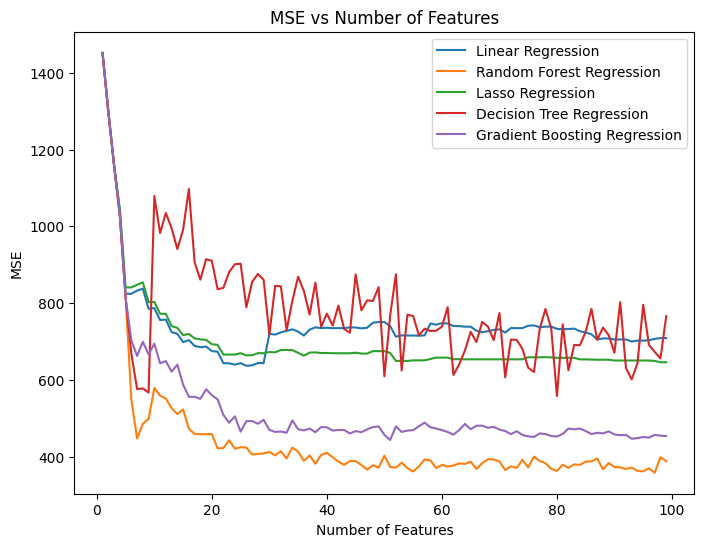

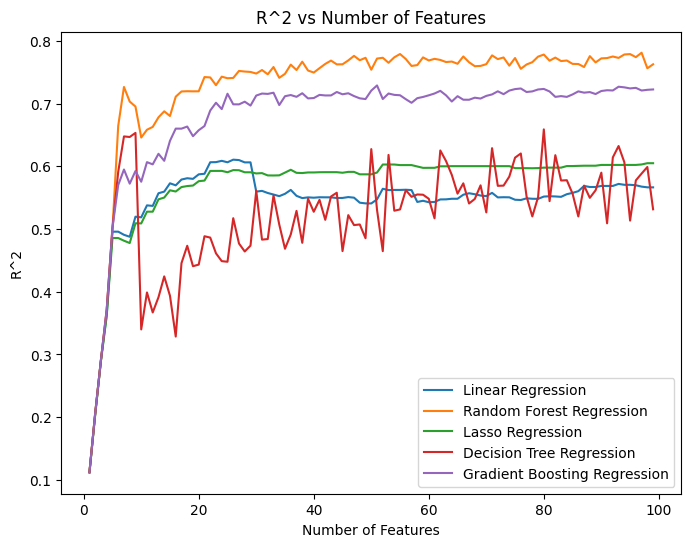

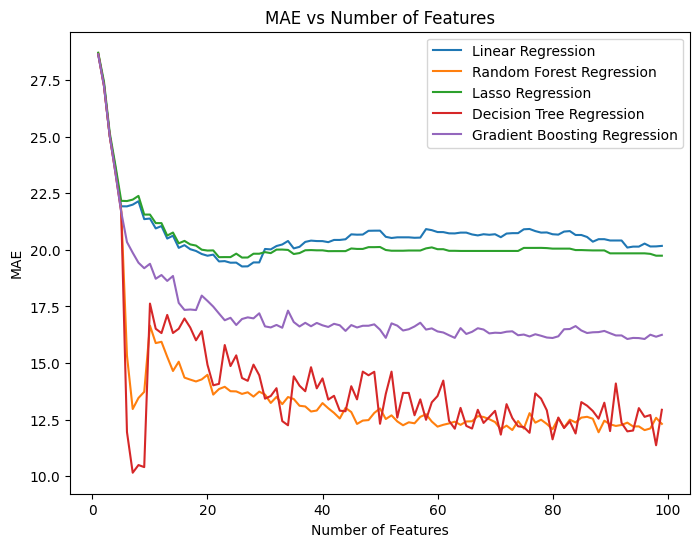

In [61]:
import matplotlib.pyplot as plt

# Plot MSE vs Number of Features
plt.figure(figsize=(8, 6))
plt.plot(n_features_range, [mse[0] for mse in mse_list], label='Linear Regression')
plt.plot(n_features_range, [mse[1] for mse in mse_list], label='Random Forest Regression')
plt.plot(n_features_range, [mse[2] for mse in mse_list], label='Lasso Regression')
plt.plot(n_features_range, [mse[3] for mse in mse_list], label='Decision Tree Regression')
plt.plot(n_features_range, [mse[4] for mse in mse_list], label='Gradient Boosting Regression')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.title('MSE vs Number of Features')
plt.legend()
plt.show()

# Plot R^2 vs Number of Features
plt.figure(figsize=(8, 6))
plt.plot(n_features_range, [r2[0] for r2 in r2_list], label='Linear Regression')
plt.plot(n_features_range, [r2[1] for r2 in r2_list], label='Random Forest Regression')
plt.plot(n_features_range, [r2[2] for r2 in r2_list], label='Lasso Regression')
plt.plot(n_features_range, [r2[3] for r2 in r2_list], label='Decision Tree Regression')
plt.plot(n_features_range, [r2[4] for r2 in r2_list], label='Gradient Boosting Regression')
plt.xlabel('Number of Features')
plt.ylabel('R^2')
plt.title('R^2 vs Number of Features')
plt.legend()
plt.show()

# Plot MAE vs Number of Features
plt.figure(figsize=(8, 6))
plt.plot(n_features_range, [mae[0] for mae in mae_list], label='Linear Regression')
plt.plot(n_features_range, [mae[1] for mae in mae_list], label='Random Forest Regression')
plt.plot(n_features_range, [mae[2] for mae in mae_list], label='Lasso Regression')
plt.plot(n_features_range, [mae[3] for mae in mae_list], label='Decision Tree Regression')
plt.plot(n_features_range, [mae[4] for mae in mae_list], label='Gradient Boosting Regression')
plt.xlabel('Number of Features')
plt.ylabel('MAE')
plt.title('MAE vs Number of Features')
plt.legend()
plt.show()


**CONCLUSION**

---



The below observations were made after all this:
1. Random Forest Tree came out to be the best in the first two trains (all features and 10 features with PCA) on the basis of MSE and R2ˆ.
2. The accuracy in the latter case decreased.
3. The train for the features better than the random feature also resulted in a decreased accuracy.
4. In the 3 graphs, the values of MSE and MAE keep on decreasing and that of R2ˆ keeps on increasing as the number of features increases.
This leads us to the conclusion that using maximum features is beneficial to our model.

One reason for this could be a weak correlation among all the features. By this we mean, no two features stand out with a strong correlation.